<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not?
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not?

In [ ]:
# How freq does "this guy" donate?
# How freq will "this guy" donate in the future?
# Likelyhood of "this guy will donate again in the future?


# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# Read the data
blood = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# explore and clean
blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
blood.describe()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.000000                                    0.000000  
50%        28.000000                                    0.000000  
75%        50.000000                                    0.000000  
max        98.000000                                    1.000000

In [5]:
# EDA
print("\n/First few rows of the dataset:")
blood.head()


/First few rows of the dataset:


Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

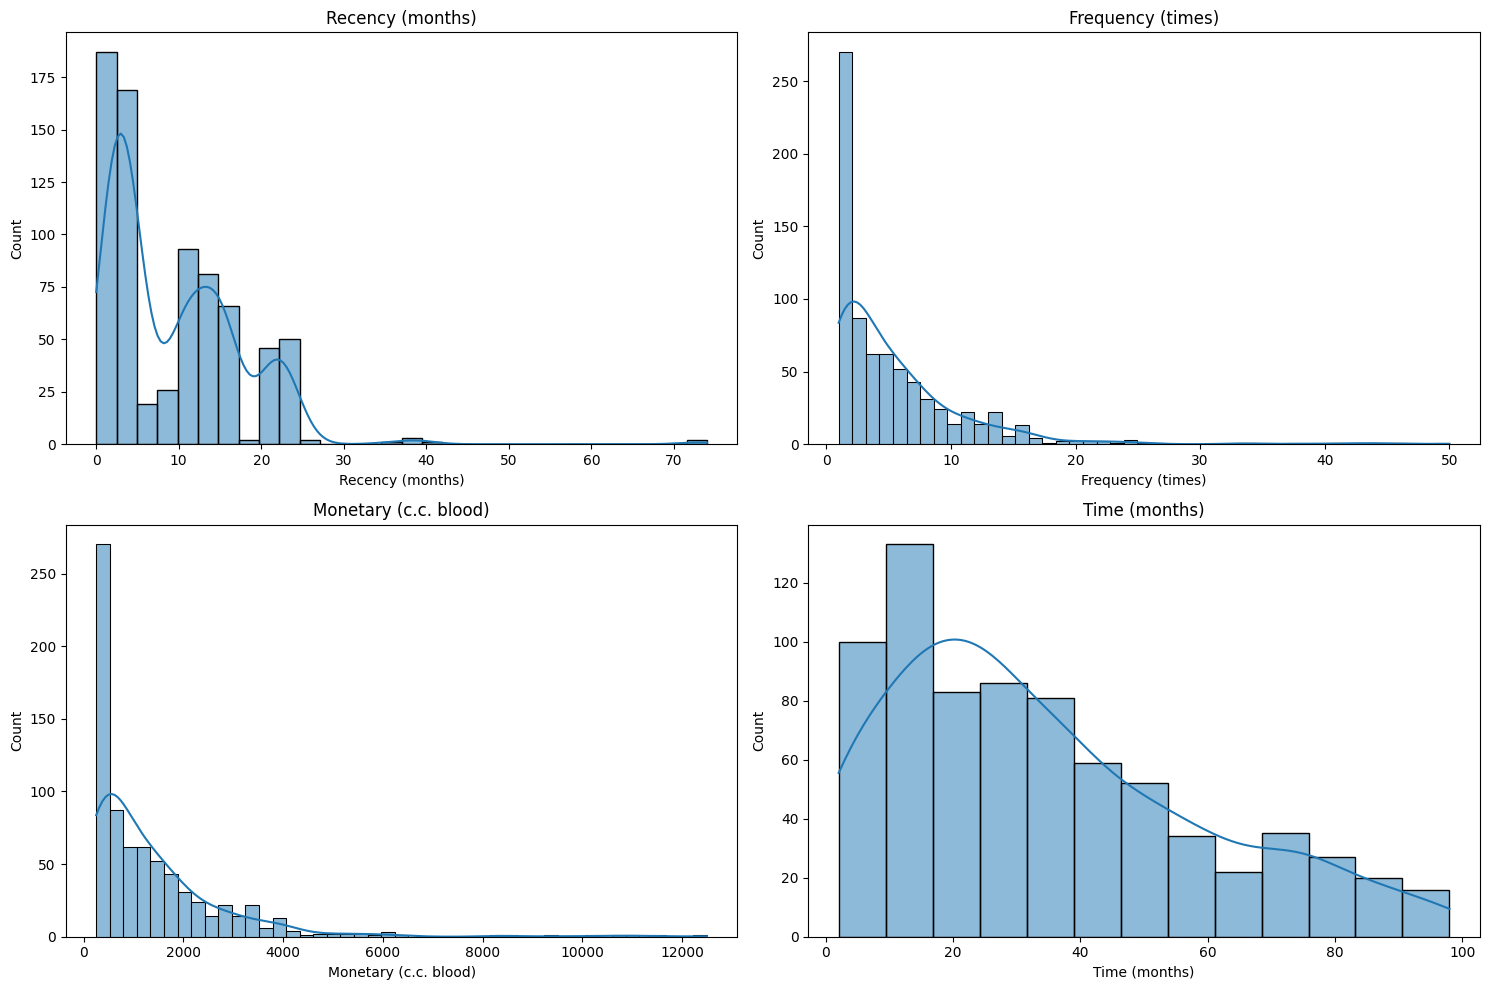

In [6]:
# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(blood['Recency (months)'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Recency (months)')
sns.histplot(blood['Frequency (times)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Frequency (times)')
sns.histplot(blood['Monetary (c.c. blood)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Monetary (c.c. blood)')
sns.histplot(blood['Time (months)'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Time (months)')
plt.tight_layout()
plt.show()

In [7]:
# missing val
blood.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [8]:
print("\nDistribution of the target variable:")
blood['whether he/she donated blood in March 2007'].value_counts(normalize=True)


Distribution of the target variable:


whether he/she donated blood in March 2007
0    0.762032
1    0.237968
Name: proportion, dtype: float64

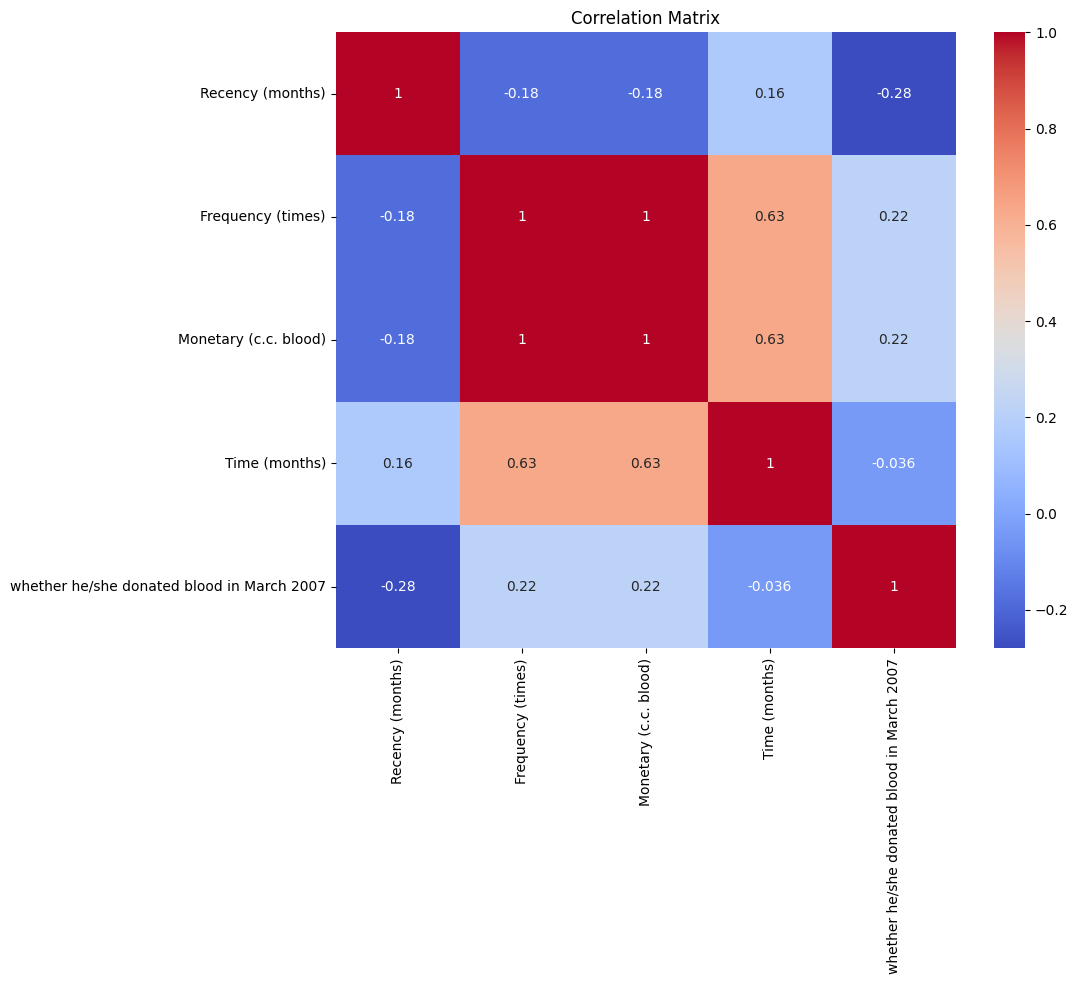

In [9]:
# Corr matrix
plt.figure(figsize=(10, 8))
sns.heatmap(blood.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Strong positive correlation (0.97) between 'Frequency' and 'Monetary', which is expected as they represent similar information.
#Moderate negative correlation (-0.52) between 'Recency' and 'Frequency'/'Monetary', suggesting that more frequent donors tend to have donated more recently.

In [23]:
# Overview
# 748 Rows and 5 columns.
# no missing vals (so we are good)

In [24]:
# target variable distribution:
# roughly 76.2% of the samples are negatives (no blood donation in Mar 2007)
# about 23.8% are positive (donated in Mar 2007)
# indicates a class imbalance

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [19]:
# No missing values or obvious data issues, so we can proceed

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [10]:
# input variable (features)
X = blood.drop('whether he/she donated blood in March 2007', axis=1)

In [11]:
# output variable (label)
y = blood['whether he/she donated blood in March 2007']

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [12]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [14]:
# model
dt = DecisionTreeClassifier(random_state=42)

# Step 9: Fit the Model

In [15]:
# fit
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [16]:
#Verify and Evaluate the Training Model
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])

In [20]:
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9381


In [21]:
print(f"Training ROC AUC: {train_roc_auc:.4f}")

Training ROC AUC: 0.9840


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [22]:
# Predictions and Evaluate the Test Model
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

In [25]:
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6533


In [26]:
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test ROC AUC: 0.5271


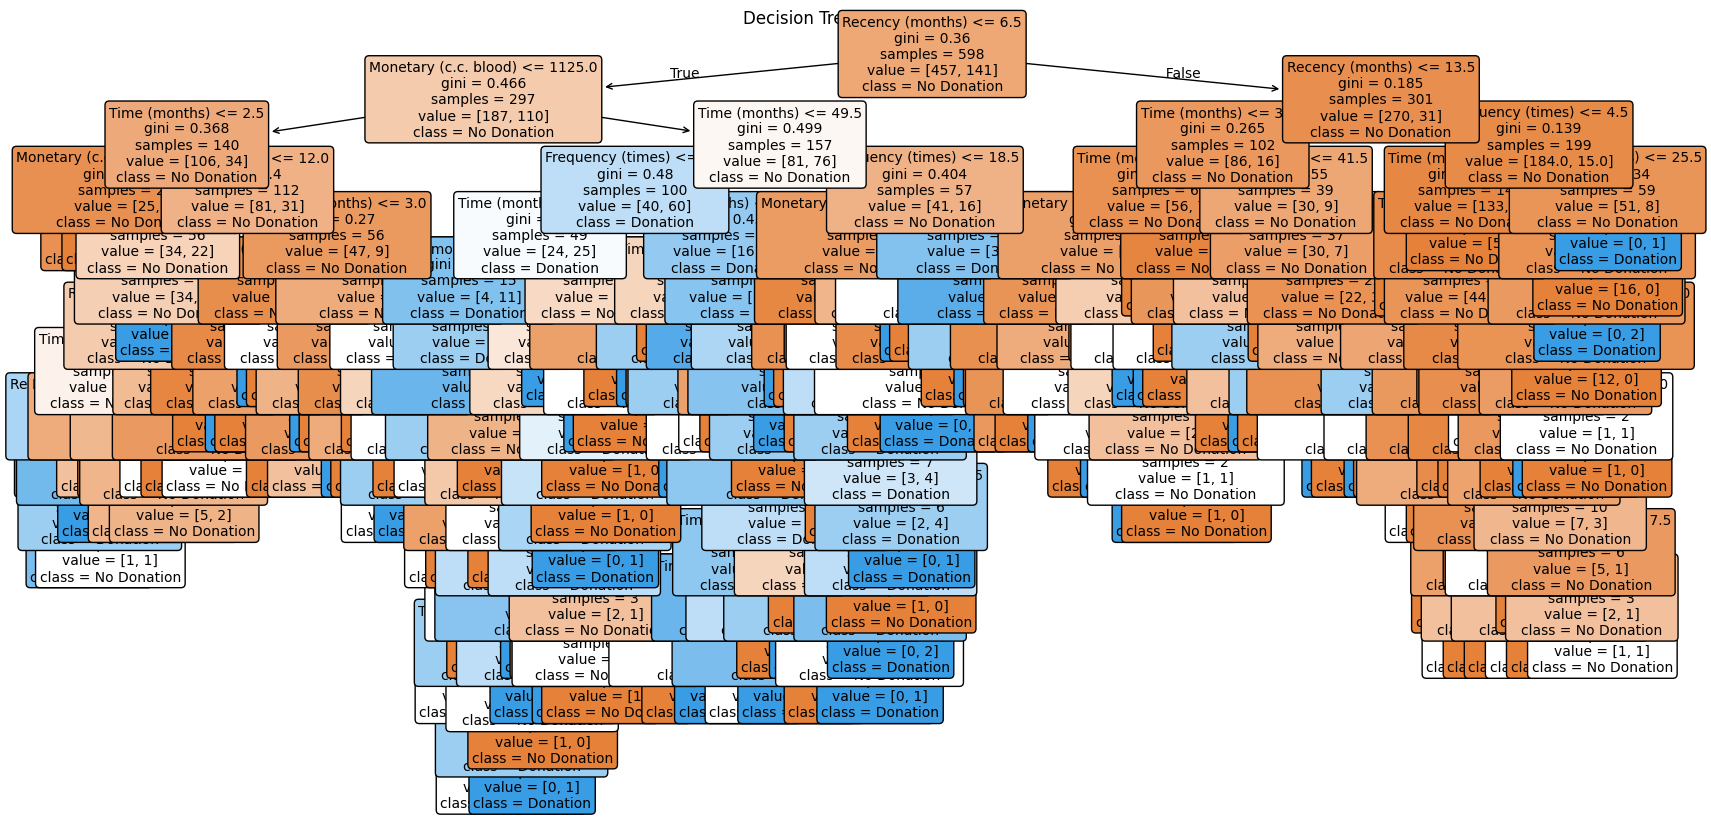

In [37]:
# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No Donation', 'Donation'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [39]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       113
           1       0.26      0.22      0.24        37

    accuracy                           0.65       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.63      0.65      0.64       150



# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [38]:
from sklearn.inspection import permutation_importance

In [45]:
print("\nModel Evaluation:")
print(f"The decision tree model achieved an accuracy of {test_accuracy:.4f} and an ROC AUC score of {test_roc_auc:.4f} on the test set.")
print("This model can be used to predict whether an individual is likely to donate blood in March 2007 based on their donation history.")


Model Evaluation:
The decision tree model achieved an accuracy of 0.6533 and an ROC AUC score of 0.5271 on the test set.
This model can be used to predict whether an individual is likely to donate blood in March 2007 based on their donation history.


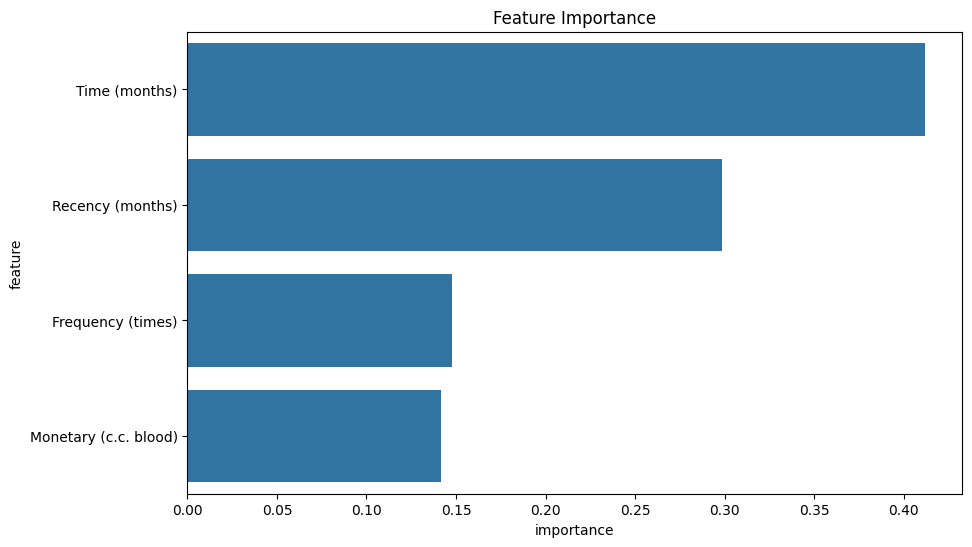

In [40]:
# Feature importance (visualizations)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

<Figure size 1000x600 with 0 Axes>

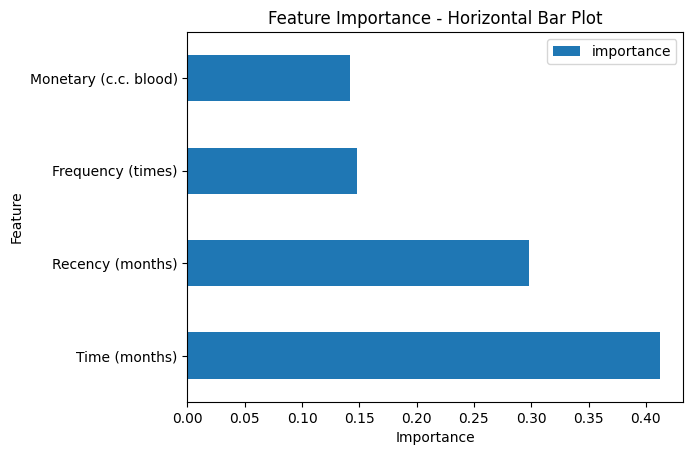

In [42]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
feature_importance.plot(x='feature', y='importance', kind='barh')
plt.title('Feature Importance - Horizontal Bar Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

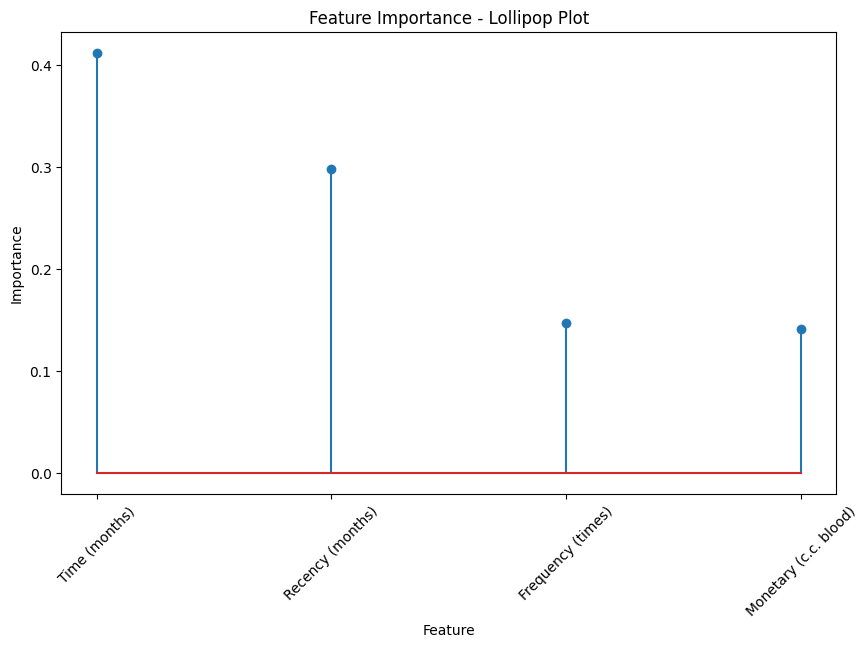

In [43]:
#Lollipop Plot
plt.figure(figsize=(10, 6))
plt.stem(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance - Lollipop Plot')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

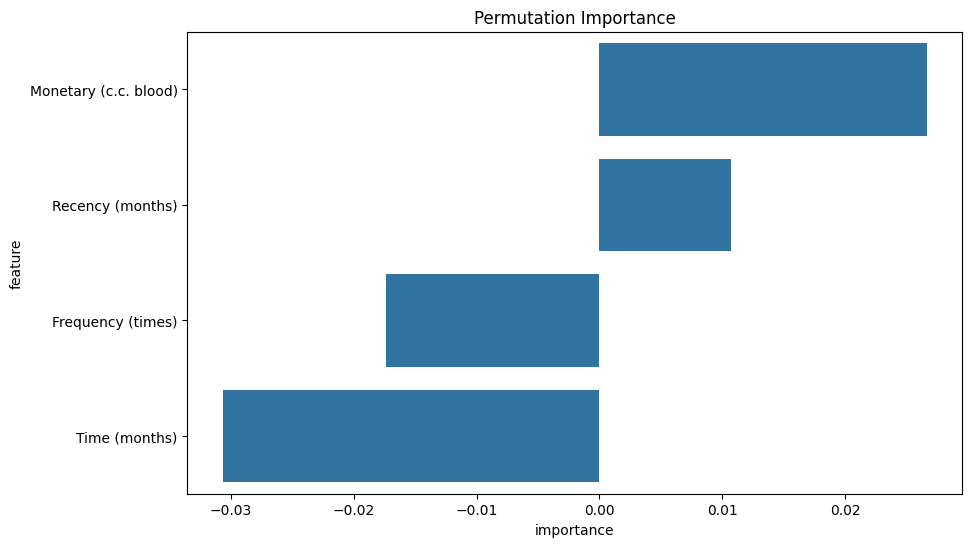

In [44]:
#Permutation Importance
perm_importance = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()

In [50]:
# IQR to remove outliers 
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
def analyze_data(data, title):
    X = data.drop('whether he/she donated blood in March 2007', axis=1)
    y = data['whether he/she donated blood in March 2007']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dt = DecisionTreeClassifier(random_state=42, max_depth=5)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_roc_auc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])
    test_roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

    print(f"\n--- {title} ---")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Training ROC AUC: {train_roc_auc:.4f}")
    print(f"Test ROC AUC: {test_roc_auc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

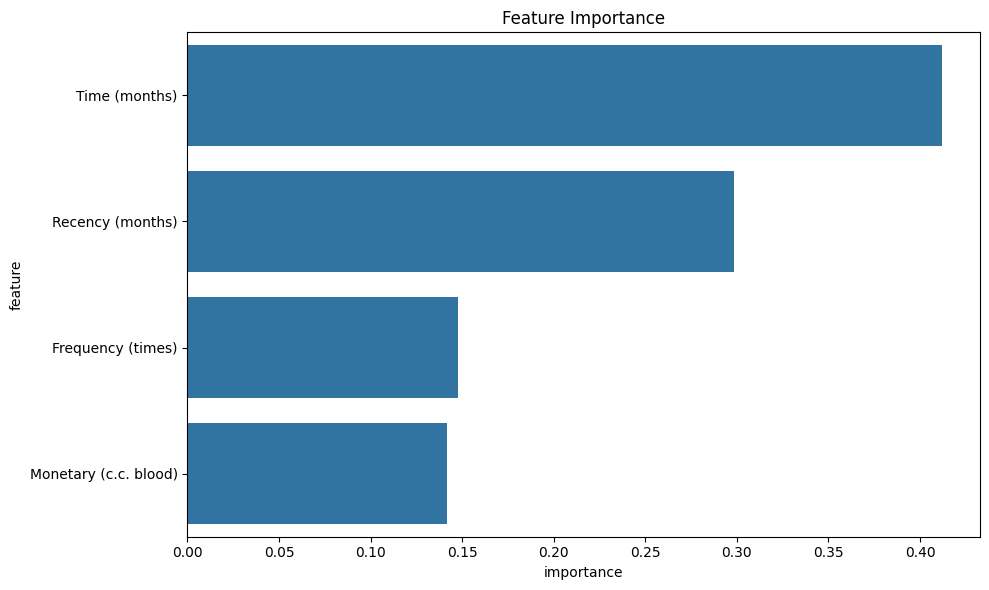

In [56]:
#  plot 
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
    
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title(f'Feature Importance')
plt.tight_layout()
plt.show()

In [57]:
# with outliers
analyze_data(blood, "With Outliers")


--- With Outliers ---
Training Accuracy: 0.8244
Test Accuracy: 0.7800
Training ROC AUC: 0.8445
Test ROC AUC: 0.6648

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       113
           1       0.64      0.24      0.35        37

    accuracy                           0.78       150
   macro avg       0.72      0.60      0.61       150
weighted avg       0.76      0.78      0.74       150



In [59]:
# remove outliers
blood_no_outliers = remove_outliers(blood)
print(f"\nRows removed: {len(blood) - len(blood_no_outliers)}")


Rows removed: 210


In [63]:
# without outliers 
analyze_data(blood_no_outliers, "Without Outliers")

IndexError: index 1 is out of bounds for axis 1 with size 1

In [61]:
print(f"Training Set Class Distribution: \n{y_train.value_counts()}")
print(f"Test Set Class Distribution: \n{y_test.value_counts()}")

Training Set Class Distribution: 
whether he/she donated blood in March 2007
0    457
1    141
Name: count, dtype: int64
Test Set Class Distribution: 
whether he/she donated blood in March 2007
0    113
1     37
Name: count, dtype: int64


In [62]:
proba = dt.predict_proba(X_train)
print(f"Shape of predict_proba: {proba.shape}")

Shape of predict_proba: (598, 2)




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



